In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [4]:
# Create a Deep Neural Network model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=4))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [5]:
X_train[0]

array([-1.47393679,  1.20365799, -1.56253475, -1.31260282])

In [6]:
150/32

4.6875

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
len(y_train)

120

In [9]:
len(X_train)

120

An epoch is composed of many iterations (or batches). Iterations: the number of batches needed to complete one Epoch. Batch Size: The number of training samples used in one iteration. Epoch: one full cycle through the training dataset

In [10]:
X_train.shape

(120, 4)

In [11]:
y_train.shape

(120, 3)

In [12]:
150/32
#So 4 iterations are required for 1 epoch(to pass the whole training dataset).

4.6875

In [13]:
# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                  validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 1.0622 - accuracy: 0.4333 - val_loss: 0.9598 - val_accuracy: 0.9000
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9422 - accuracy: 0.8167 - val_loss: 0.8557 - val_accuracy: 0.9000
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8452 - accuracy: 0.8250 - val_loss: 0.7628 - val_accuracy: 0.9000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7629 - accuracy: 0.8500 - val_loss: 0.6792 - val_accuracy: 0.9000
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6831 - accuracy: 0.8500 - val_loss: 0.6073 - val_accuracy: 0.9000
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6196 - accuracy: 0.8500 - val_loss: 0.5452 - val_accuracy: 0.9000
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5671 - accuracy: 0.8417 - val_loss: 0.4936 - val_accuracy: 0.9000
Epoch 8/100
4/4 [===

In [14]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 4}

In [15]:
X_train.shape

(120, 4)

In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 65ms/step - loss: 0.0239 - accuracy: 1.0000
Test Loss: 0.023855816572904587
Test Accuracy: 1.0


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 5703 (22.28 KB)
Trainable params: 5703 (22.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


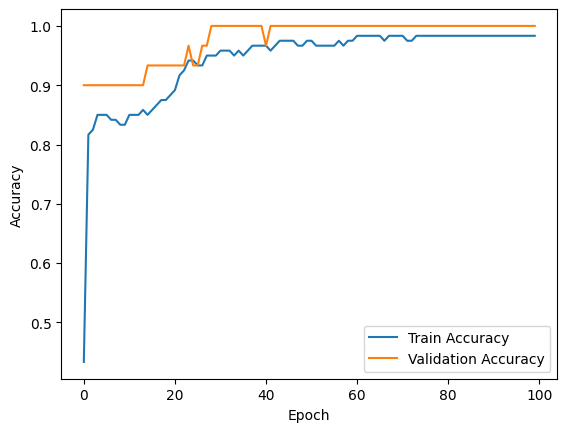

In [19]:
# Plot accuracy and loss versus epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

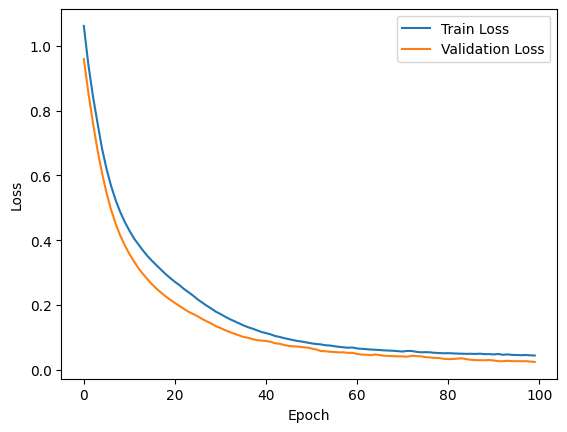

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Training loss and testing loss are almost same. So this is a good fitting model.

In [21]:
#same model done using keras from tensorflow
#good practice
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoded format
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Define and compile your model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=4))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train your model
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test_one_hot))


Epoch 1/100
4/4 [==============================] - 1s 65ms/step - loss: 1.0431 - accuracy: 0.4167 - val_loss: 0.9238 - val_accuracy: 0.8667
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9144 - accuracy: 0.8000 - val_loss: 0.8081 - val_accuracy: 0.8667
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8113 - accuracy: 0.8083 - val_loss: 0.7101 - val_accuracy: 0.8667
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7224 - accuracy: 0.8167 - val_loss: 0.6288 - val_accuracy: 0.8667
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6504 - accuracy: 0.8083 - val_loss: 0.5599 - val_accuracy: 0.8667
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5887 - accuracy: 0.8167 - val_loss: 0.5022 - val_accuracy: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5390 - accuracy: 0.8250 - val_loss: 0.4545 - val_accuracy: 0.9000
Epoch 8/100
4/4 [===